# <img style="float: ;margin: 10px 10px 15px 15px;" src="http://www.ethlife.ethz.ch/archive_articles/100923_CMS_News_su/100923_CMS_L.png?hires" width="300"> 

# <hr> Tracking efficiency in CMS HI run2 analysis

The HiTracking of CMS from run1 to run2 has changed significantly. In run1, there was only hiBasicTracking, which only involved the first iterations (algo = 4) with pixel triplet seeds. In run2, we now have 5 iteration of tracking in standard HI reconstruction. 4 of the tracking iterations are global tracking and 1 of them is regional tracking. Besides more tracking iterations, we have also implemented the pixel cluster splitting inside of a high energy jet core. Together with jet core iteration of tracking, the efficiency of high $p_{T}$ has been improved a few percent. Moreover, the quality of tracks are switched to MVA from cut based, which also improves the efficiency significantly.  

## <hr> Purpose of the notes
- Available efficiency "table" 
- MC andn Data samples
- Run instructions
- MC and Data cut variable comparison
- Track cuts and its definition
- Performance plots

## <hr> Available efficiency "table" so far

if you want to use the current framework to do track correction, you should git clone the whole Repo, 
<pre><code> git clone https://github.com/cmsHiTracking/TrackingCode.git </pre></code>

then go to HIRun2015Ana to see <strong> Demo.C </strong> for instructions to get correction factors. 

The tables that are currently available:
- <strong> PbPb_eff_MC_v1.root</strong>, which corresponds to the MB sample listed below

This table is currently served as an example. There are a number of things that are not corrected. For example, there is no updated alignment (no updated GlobalTag) in this sample, nor as corrected in this table. Also, there is no vertex reweighting in this table. 

<strong> 
if one is looking for a sample table, this one should be good enough. However, for real analysis, analyzers should either wait for the tracking team to update this table with AGREE set of cuts and run conditions or produce their own table with proof of validation </strong>



## <hr> MC and Data samples

### PbPb

- MC MB sample for <strong> MB tracking efficiency </strong> that we are currently using is:

<pre><code> /Hydjet_Quenched_MinBias_5020GeV_750/velicanu-Hydjet_Quenched_MinBias_5020GeV_750_RECODEBUG_v0-eb8cf5655150b59e96d879ea397567ad/USER </pre></code> <A HREF="https://cmsweb.cern.ch/das/request?instance=prod%2Fphys03&limit=50&input=%2FHydjet_Quenched_MinBias_5020GeV_750%2Fvelicanu-Hydjet_Quenched_MinBias_5020GeV_750_RECODEBUG_v0-eb8cf5655150b59e96d879ea397567ad%2FUSER&view=list">Click Me for DAS link</A>

- MC dijet embedded samples for <strong> jet pthat cross section reweighed tracking efficiency </strong> <A HREF="https://cmsweb.cern.ch/das/request?view=list&limit=50&instance=prod%2Fphys03&input=dataset%3D%2FPYTHIA_QCD_TuneCUETP8M1_cfi_GEN_SIM_5020GeV%2Fdgulhan-Pythia8_Dijet*_pp_TuneCUETP8M1_Hydjet_MinBias_5020GeV_RECODEBUG_758_PrivMC-3e72696a43b93eac877e11bff9ae8846%2FUSER">Click Me for DAS link</A>

- Data Minimum Bias sample used in MC and Data comparison is from run = 262695:
<pre><code>  /HIMinimumBias2/HIRun2015-PromptReco-v1/AOD </pre></code> <A HREF="https://cmsweb.cern.ch/das/request?view=list&limit=50&instance=prod%2Fglobal&input=file+dataset%3D%2FHIMinimumBias2%2FHIRun2015-PromptReco-v1%2FAOD+run%3D262695">Click Me for DAS link</A>

### pp

- Pythia8 sample for <strong> MB tracking efficiency </strong> <A HREF="https://cmsweb.cern.ch/das/request?view=list&limit=50&instance=prod%2Fphys03&input=dataset%3D%2FMinBias_TuneCUETP8M1_5p02TeV-pythia8%2Fvelicanu-MinBias_TuneCUETP8M1_5p02TeV_pythia8_pp502Fall15_MCRUN2_71_V1_ppreco_RECODEBUG_v0-7e667b366ec9f78f6c17c0c180e48a92%2FUSER">Click Me for DAS link</A>

- Pythia8 dijet embedded sample for <strong> jet pthat cross section reweighed tracking efficiency </strong> <A HREF="https://cmsweb.cern.ch/das/request?view=list&limit=50&instance=prod%2Fphys03&input=dataset%3D%2FPYTHIA_QCD_TuneCUETP8M1_cfi_GEN_SIM_5020GeV%2Fdgulhan-PYTHIA_QCD*_TuneCUETP8M1_cfi_RECODEBUGpp_757p1_timeslew_HcalRespCorrs_v4_00_mc-c07639e7a979585d894f3640ecde366a%2FUSER">Click Me for DAS link</A>
    

## <hr> Run instructions

- Basic run:
    - go to the run config: <strong> TrackingCode/HIRun2015Ana/test/run_PbPb_cfg.py </strong>
    - Check the block "Track Cuts" to see if all the parameters are set correctly as well as the run options
    - Double check the test sample 
    - then do <pre><code> cmsRun run_PbPb_cfg.py </pre></code>

- Default option of Basic run:
    - $p_{T}$, $\eta$, and centrality are in default binning
    - doVtxReweight is <strong> False </strong>
    - useCentrality is <strong> False </strong>
    - fillNtuple is <strong> False </strong>
    - applyTrackCut is <strong> True </strong>
    - applyVertexZCut is <strong> True </strong>
    - doCaloMatched is <strong> True </strong>, reso is 0.2 in default
    
- Advanced settings

    - go to <strong> TrackingCode/HIRun2015Ana/python/HITrackCorrectionAnalyzer_cfi.py </strong>
    - one can change the default binning, such as $p_{T}$, $\eta$, and centrality
    - if one wants to reweight the vertex distribution, then there is a vector parameter needs to be setup before turn <strong> doVtxReweight </strong> on
    
    <pre><code> vtxWeightParameters = cms.vdouble( a1, b1, c1, a2, b2, c2 ),</pre></code>
    
    where the a1, b1, c1 are normalization constant, mean, and standard deviation of the vertex Z distribution in <strong> Data </strong> respectively, and a2,b2,c2 are the same paramaters in <strong> MC </strong>
    
    - the <strong> algoParameter </strong> stores the track algos that wanted to be included, i.e, (4,5,6,7) means only algo 4,5,6,7 are considered
    
    - <strong> crossSection </strong> in default is 1.0, which is no reweighed of the sample. If running on dijet embedded sample, see the following instructions on multicrab
    
- multicrab

    - go to <strong> crab3_multicrab_cfg.py </strong>
    - change the normal settings accordingly, then pay attention to
        - workArea
        - RequestName
        - DataSetName, this needs to find a smart way of writing the dataset, and use loops to submit different samples
        - outputDatasetTag
    - the <strong> sampleName[]</strong> and <strong> cs[] </strong> are corresponding to the current PbPb dijet embedded sample's pthat name and cross section/event respectively. 
    
    - finally, do <pre><code> python crab3_multicrab_cfg.py </pre></code>
                                 
                                      




## <hr> MC and DATA cut variable comparison

In order to use MC to generate tracking efficiency corrections, one needs to make sure the cut variable distributions are consistent between MC and Data. For example, the vertex Z distribution usually in MC is wider than that of data. Therefore the vertex reweight is necessary when obtaining the correction factors. This is in PbPb

The MC and Data samples are shown above. MC MinBas vs Data MinBias. 

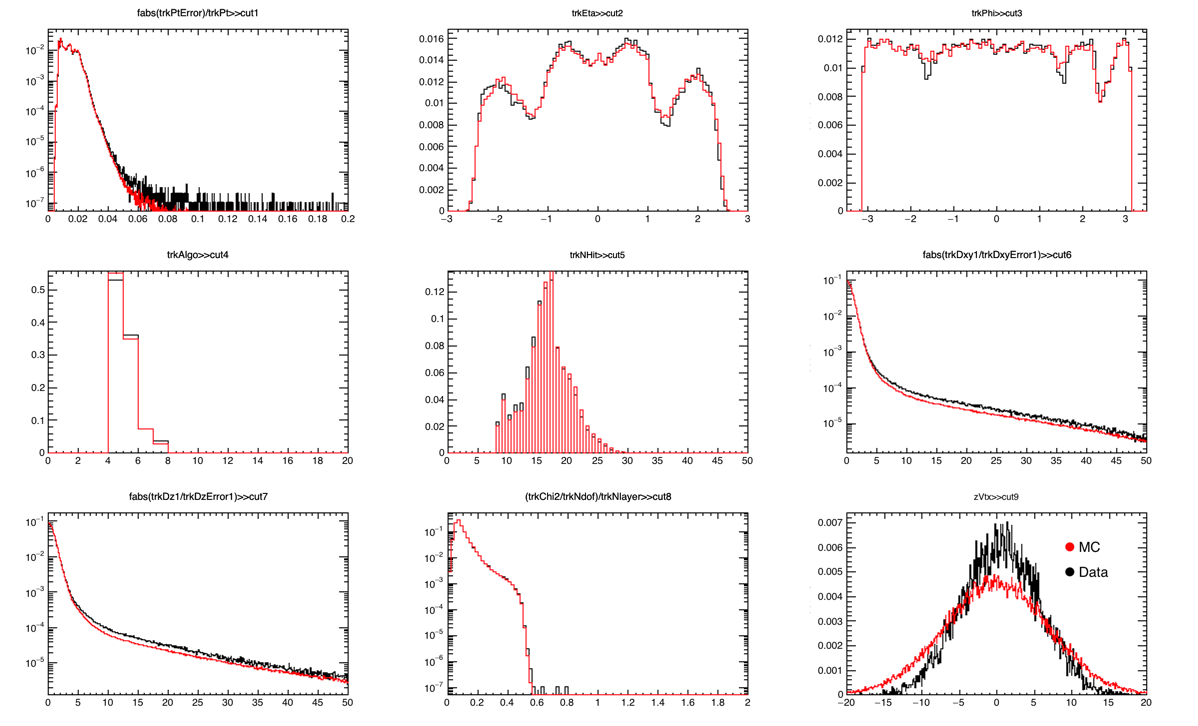

In [2]:
from IPython.display import Image
pathname = "../files/"
cutVariable = "cutVariables.png"
Image(filename = pathname + cutVariable)

## <hr> Track cuts and its definition

- <strong> Track trigger cut  </strong> is defined as:
    - track quality = highPurity
    - track algo = 4, 5, 6, 7
    - fabs(dxy/dxyError) (tracks'transverse impact parameter significance with respect to primary vertex) < 3.0
    - fabs(dz/dzError) (tracks'longitudinal impact parameter significance with respect to primary vertex ) < 3.0
    - Chi2n/nlayers (normalized Chi2 / number of hit layers) < 0.15
    - fabs(ptError)/pt < 0.1
    - nHits (number of valid hits) > 10

- <strong> non-Track trigger cut </strong> is defined as:
    - track quality = highPurity
    - fabs(dxy/dxyError) (tracks'transverse impact parameter significance with respect to primary vertex) < 3.0
    - fabs(dz/dzError) (tracks'longitudinal impact parameter significance with respect to primary vertex ) < 3.0
    - fabs(ptError)/pt < 0.3
    
The only difference between pp track-trigger cut and PbPb track-trigger cut is algo can be 4, 5, 6, 7, 8

- <strong> applyVertexZCut </strong> is defined as:
    - vertex z < 15 cm && vertex z > -15 cm
    
    
- <strong> caloMatching </strong> is only effective after 20 GeV and defined as, $\frac{\Sigma{Calo}}{CosH(\eta)} > reso \cdot{p_{T}}$ && $\frac{\Sigma{Calo}}{CosH(\eta)} > (p_{T} - 80)$, where the <strong> reso </strong> is 0.2 in default

Below is the calo matching cut demonstration

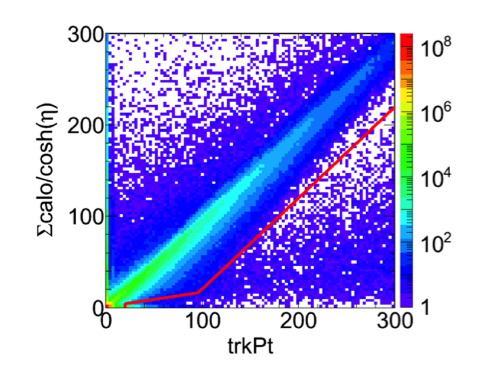

In [7]:
#demo of where the calo matching cut is
calo = "caloMatching.png"
Image(filename = pathname + calo)

## <hr> Performance plots

The tracking correction factor is defined as,

### $ getWeight = \frac{(1-fake)\times(1-secondary)}{eff\times(1+multiple)}$

<strong> See /macros/Demo.C for instructions to get this correction factor</strong>

- Plotting the following quantities as a function of $p_{T}$ and $\eta$ for different $\eta$ and $p_{T}$ ranges

    - Tracking efficiency
    - Fake rates 
    - Secondary reconstructed rates
    - Multiple reconstructed rates



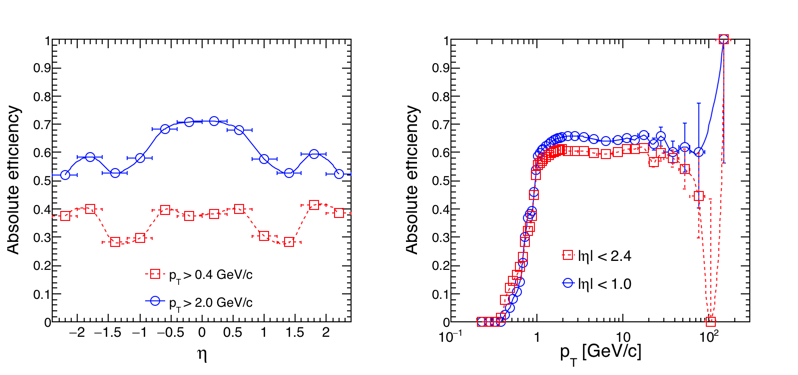

In [3]:
efficiencyName = "AbsoluteEfficiency_20151216.png"
fakeName = "FakeRate_20151216.png"
SecondaryName = "SecondaryReconstruction_20151216.png"
MultipleName = "MultipleReconstruction_20151216.png"

Image(filename = pathname + efficiencyName)

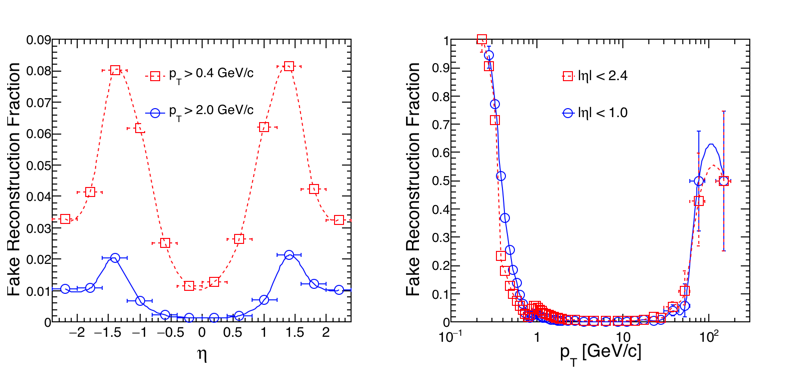

In [4]:
Image(filename = pathname + fakeName)

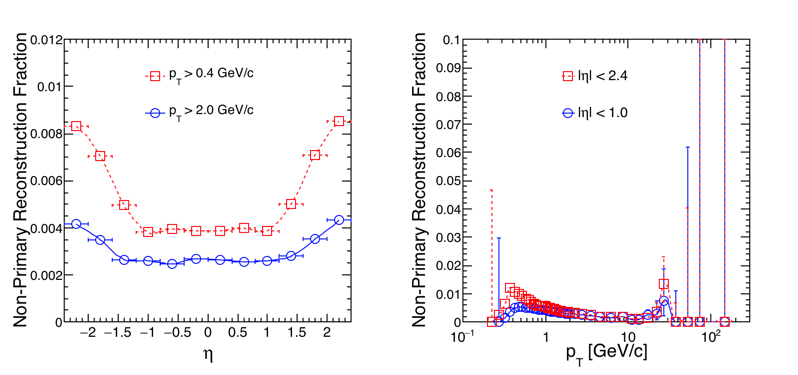

In [5]:
Image(filename = pathname + SecondaryName)

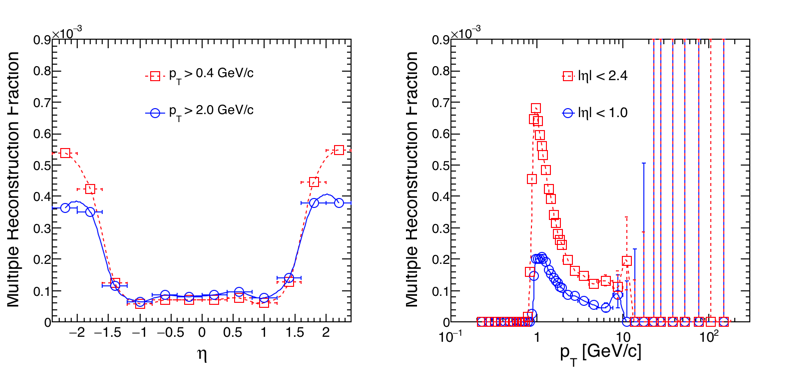

In [14]:
Image(filename = pathname + MultipleName)

### Plotting the same quantities as function of $p_{T}$ and $\eta$ but with different centrality range

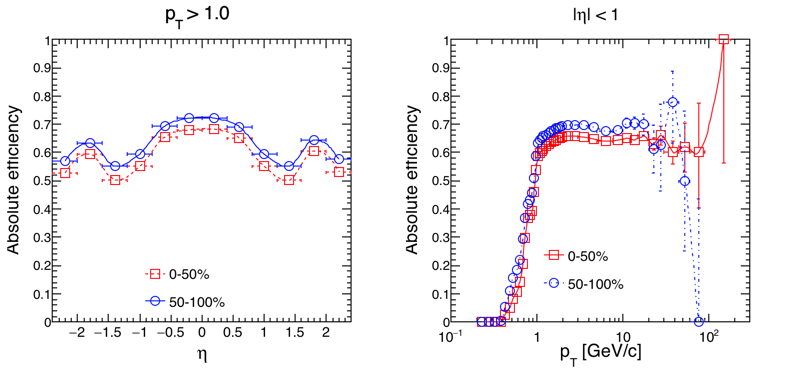

In [17]:
efficiencyName3D = "AbsoluteEfficiency3D_20151216.png"
fakeName3D = "FakeRate3D_20151216.png"
SecondaryName3D = "SecondaryReconstruction3D_20151216.png"
MultipleName3D = "MultipleReconstruction3D_20151216.png"
Image(filename = pathname + efficiencyName3D)

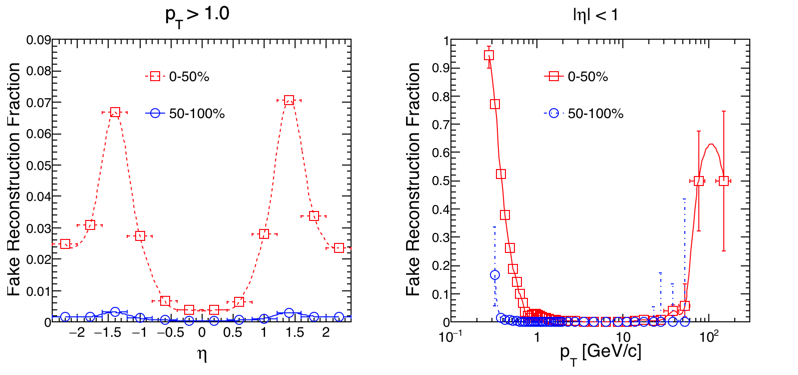

In [18]:
Image(filename = pathname + fakeName3D)

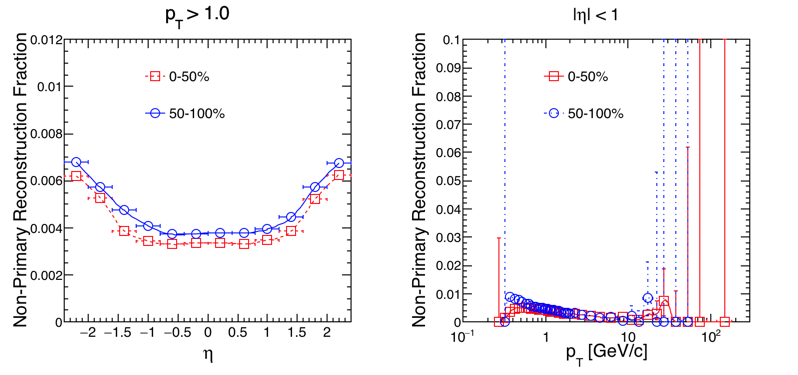

In [20]:
Image(filename = pathname + SecondaryName3D)

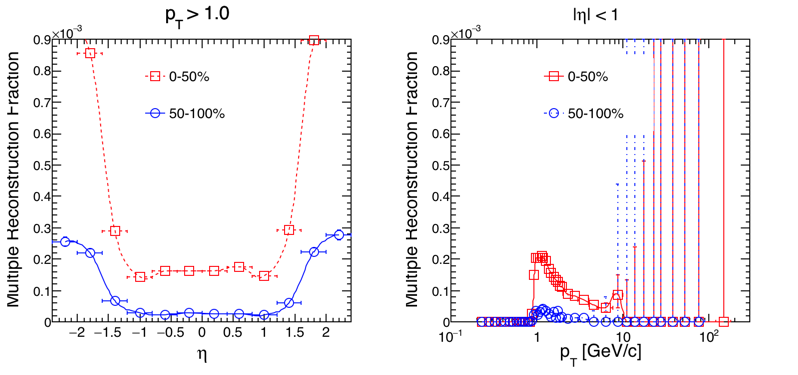

In [21]:
Image(filename = pathname + MultipleName3D)